In [1]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

In [2]:
import tweepy
import csv 

class StdOutListener(tweepy.Stream):
    def on_status(self, status):
        # saves the tweet object
        user = status.author.screen_name
        location = status.user.location
        timeTweet = status.created_at
        source = status.source
        tweet = status.text
        writer.writerow([tweet,timeTweet,user,location,source])


In [3]:
def start_streaming():
     # Opening a CSV file to save the gathered tweets
        with open("tweets.csv", 'w', encoding="utf-8", errors="ignore") as file:
            global writer
            writer = csv.writer(file)

            # Add a header row to the CSV
            writer.writerow(["Tweet", "Date", "User","Location","Source"])

            # Creating a Stream
            try:
                listener = StdOutListener(CONFIG['DEFAULT']['consumer_key'], CONFIG['DEFAULT']['consumer_secret'], CONFIG['DEFAULT']['access_token'], CONFIG['DEFAULT']['access_token_secret'])
                listener.filter(track=["#disneyplusday"])  
            except KeyboardInterrupt:
                #User pressed ctrl+c or cmd+c -- get ready to exit the program
                print("- KeyboardInterrupt caught. Closing stream and exiting.")
                listener.disconnect()
                pass 


In [4]:
start_streaming()

- KeyboardInterrupt caught. Closing stream and exiting.


In [5]:
import pandas as pd

df_tweets = pd.read_csv("tweets.csv")


In [6]:
df_tweets.head()

,Tweet,Date,User,Location,Source
0,RT @TVLine: Every Disney+ Day Announcement: Ne...,2021-11-12 22:11:32+00:00,SamuelWang2018,"Georgia, USA",Twitter for Android
1,#travel #design #DisneyPlusDay #Battlefield204...,2021-11-12 22:11:32+00:00,GraphicsTac1,NaN,Twitter for Android
2,magic in the mcu is a little more vague then i...,2021-11-12 22:11:32+00:00,lonelylethabo,he/him 🏳️‍🌈🇿🇦,Twitter Web App
3,RT @shangchi: It’s all led to this moment 💥 Ch...,2021-11-12 22:11:32+00:00,EHomeTheaterS,Minneapolis,Twitter Web App
4,RT @MarvelStudios: The second season of Marvel...,2021-11-12 22:11:32+00:00,scarwitchy,NaN,Twitter for Android


In [7]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)


In [8]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [12]:
cleaned_tweets = []
for i in range(0,len(df_tweets['Tweet'])):
    cleaned_tweets.append(cleaning_tweets((df_tweets.Tweet[i])))
print(cleaned_tweets[0:50])

['every disney day announcement news premiere dates and trailers', 'travel design disneyplusday battlefield2042', 'magic the mcu little more vague then would like hopefully will depth with magic', 'all led this moment check out this brand new featurette see the journey marvel studios shangchi and the leg', 'the second season marvel studios what ...?, animated original series coming soon disneyplu', 'marvel studios agatha house harkness original series coming soon disneyplusday', 'secret invasion dizisinde nick fury ... disneyplusday', 'this the worst list ever seen', 'marvel studios agatha house harkness original series coming soon disneyplusday', 'there giant blue carpet disneyland for disneyplusday', '', 'the disneyplusday video just blew our minds can wait for what coming !!!', 'the second season marvel studios what ...?, animated original series coming soon disneypl', 'marvel original series from marvel studios coming summer 2022 disneyplusday', '', 'quoiiiijhgccrhv', 'primer logo 

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["disney","disneyplus","disneyplusday"])

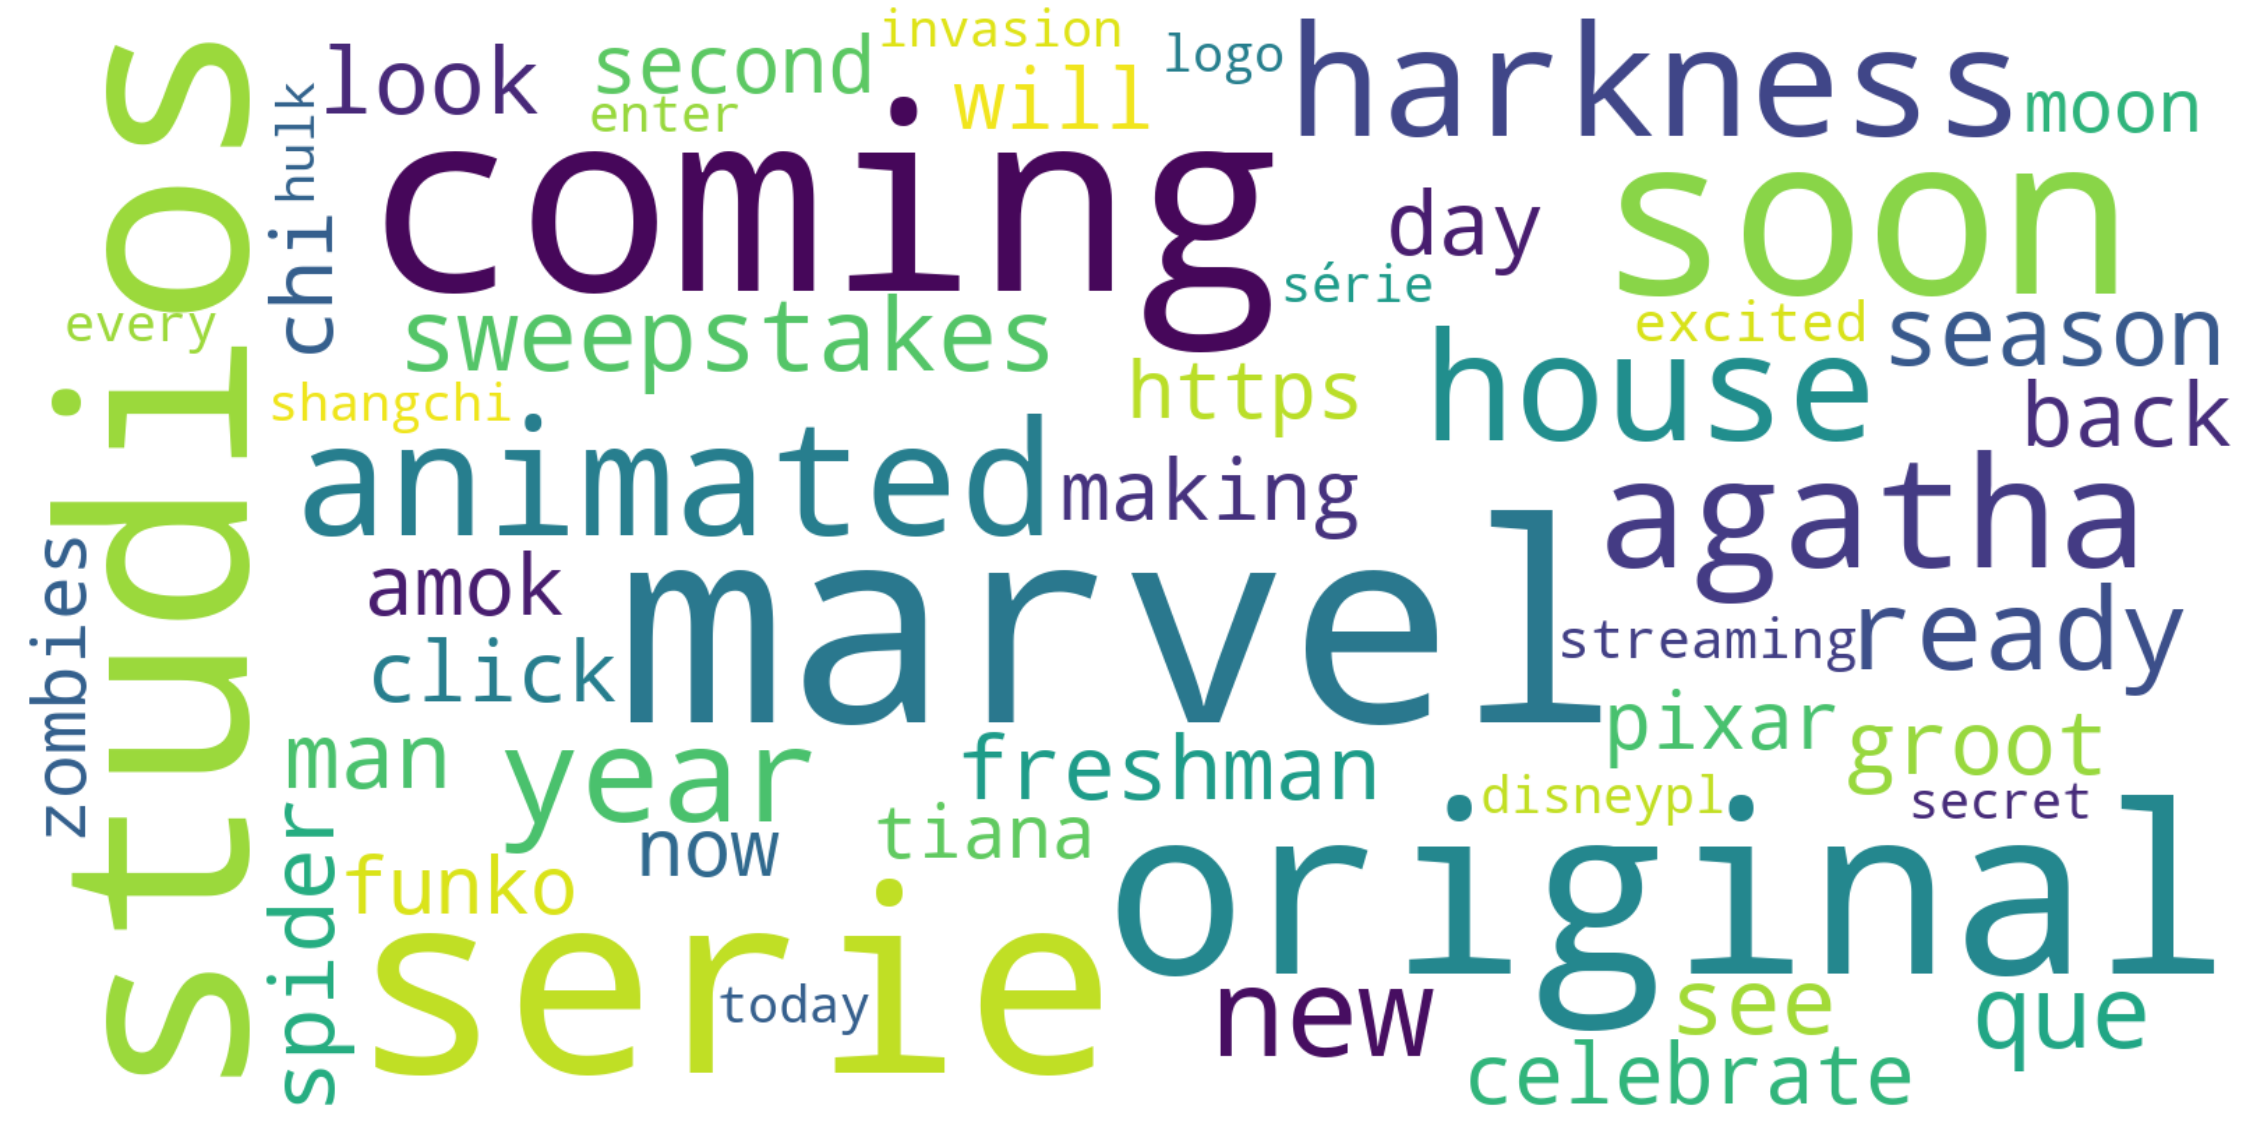

In [16]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
import numpy as np
from PIL import Image
import random

In [24]:
mask = np.array(Image.open('./mickey.png'))

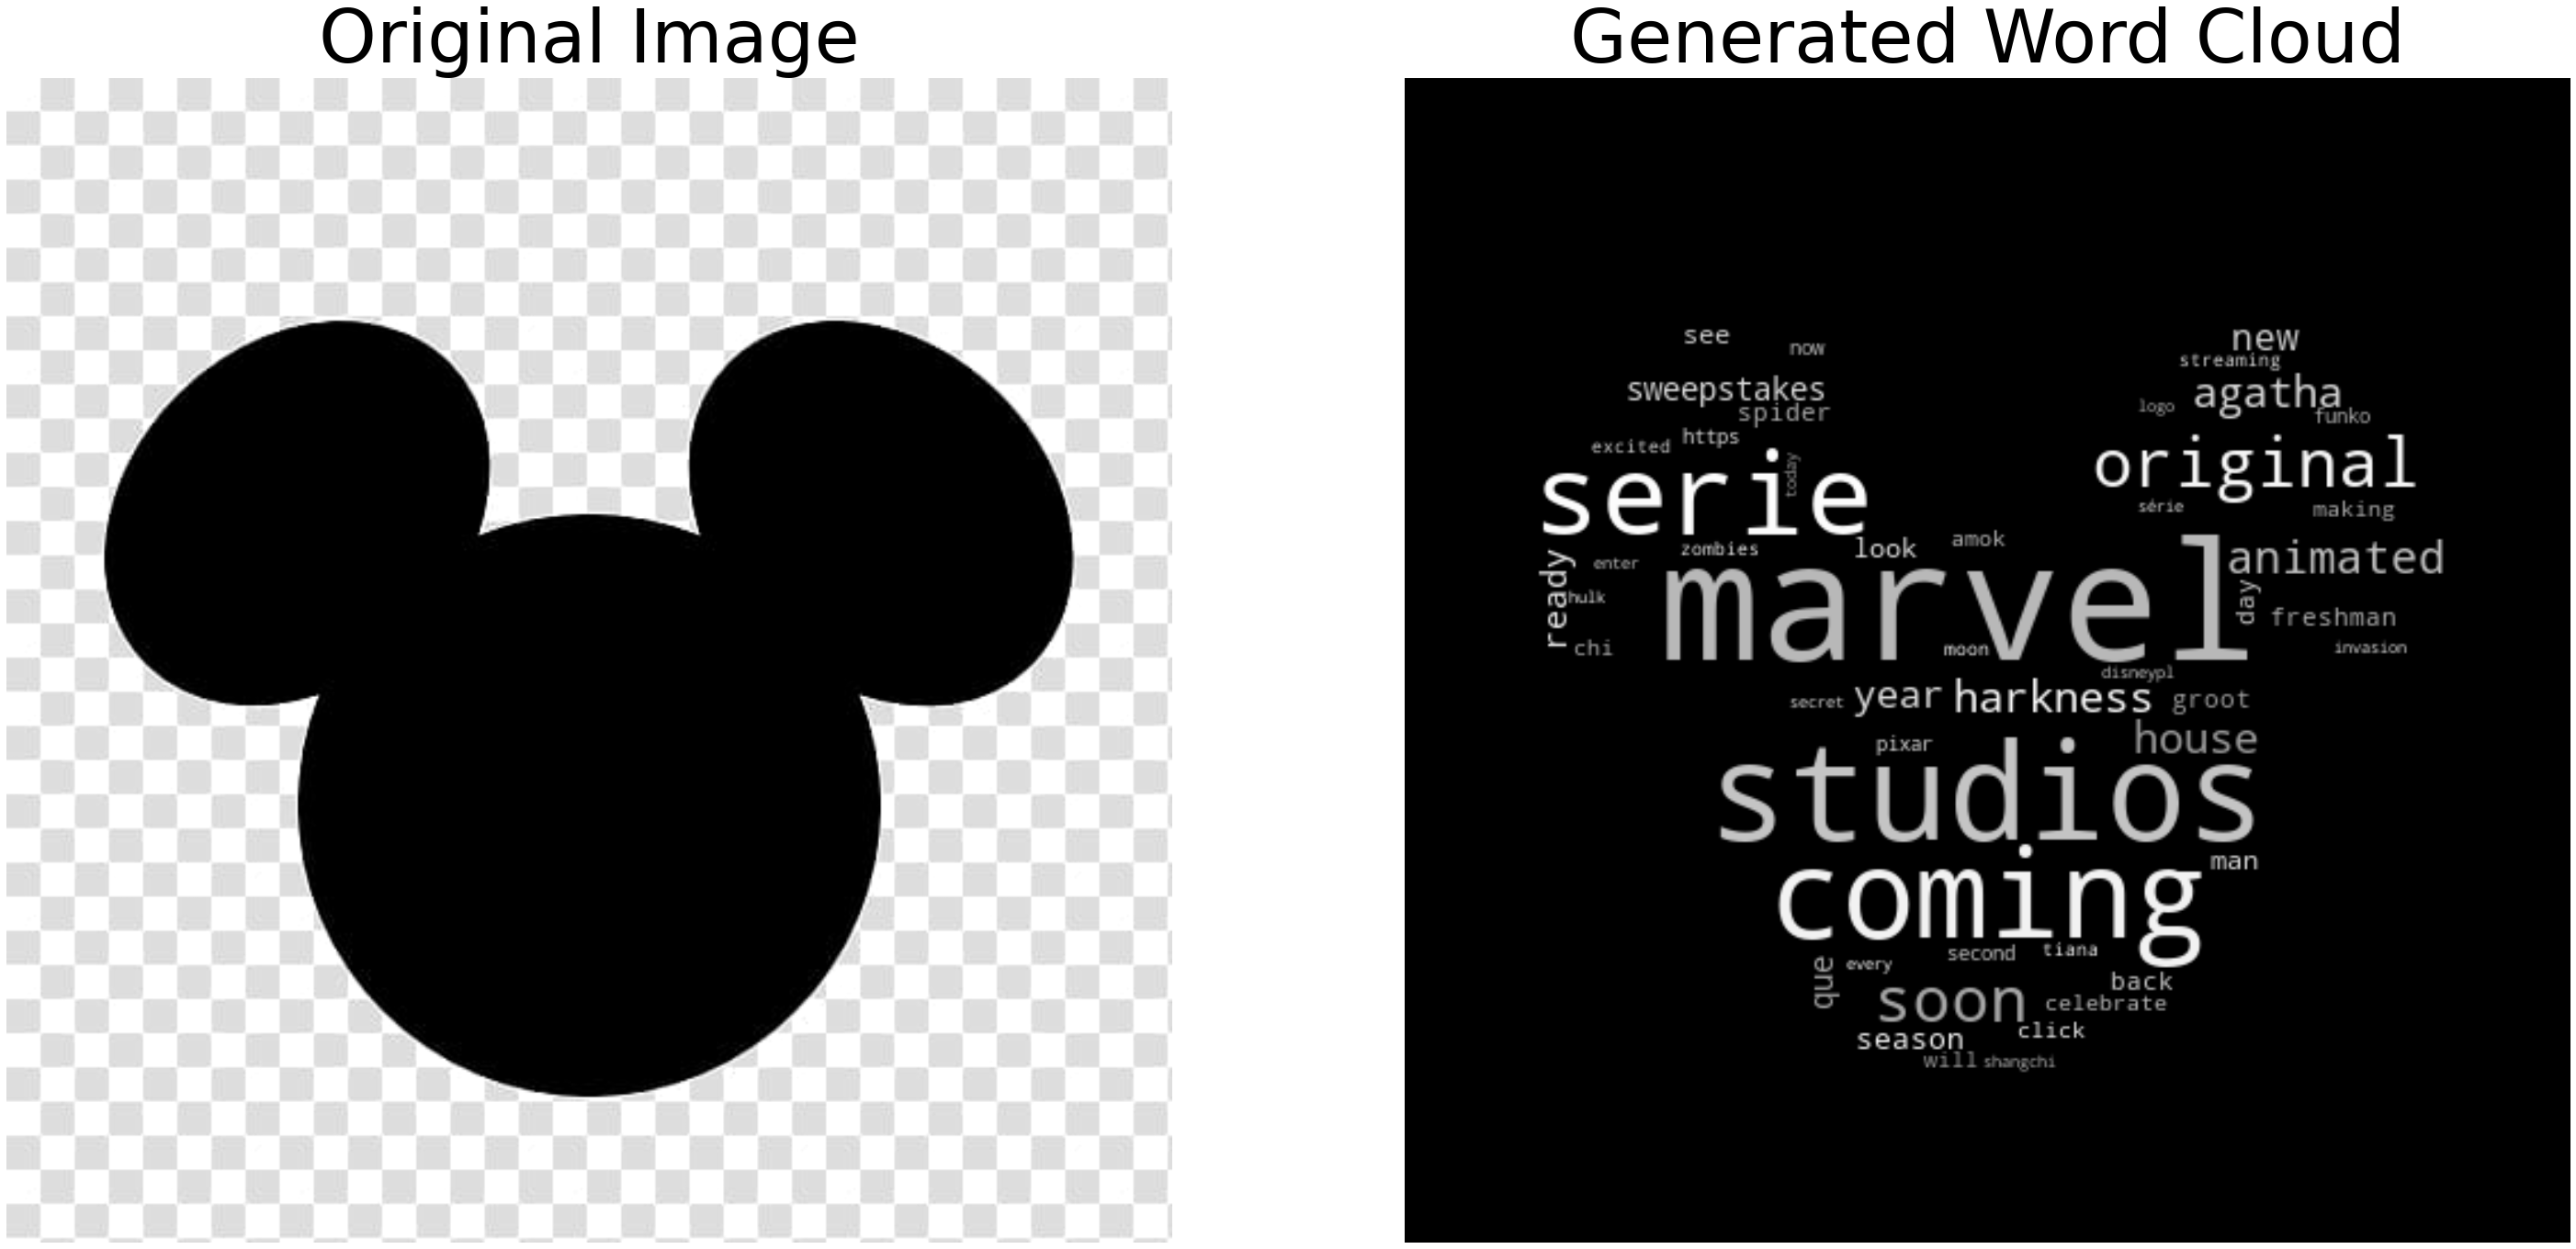

In [25]:
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
plt.title('Original Image', size=80)

plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title('Generated Word Cloud', size=80)
plt.axis("off")
plt.show()

In [26]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [27]:
sid.polarity_scores("I like Disney!")

{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'compound': 0.4199}

In [28]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [29]:
calculate_sentiment("I love Disney!")

0.6696

In [31]:
df_tweets['Sentiment Score'] = df_tweets['Tweet'].apply(calculate_sentiment)
df_tweets.sort_values(by='Sentiment Score', ascending=False)[:15]

,Tweet,Date,User,Location,Source,Sentiment Score
317,RT @KiraHunston: It was a super honour to work...,2021-11-12 22:12:24+00:00,KiraHunston,"Vancouver, British Columbia",Twitter for iPhone,0.8847
309,RT @DisneyParks: The inaugural #DisneyPlusDay ...,2021-11-12 22:12:22+00:00,disneyplus,NaN,Twitter for iPhone,0.8658
112,RT @MrJeffTrammell: I can finally share this n...,2021-11-12 22:11:52+00:00,HinataUzumakiPo,NaN,Twitter Web App,0.8464
141,RT @disneyplus: The future starts here. Celebr...,2021-11-12 22:11:55+00:00,AllieLovesFunko,United States,Twitter for iPhone,0.8360
54,RT @OnTheRedCarpet: The future starts here. Ce...,2021-11-12 22:11:41+00:00,mattrodrigz2011,Wonderland,Twitter Web App,0.8360
152,RT @disneyplus: The future starts here. Celebr...,2021-11-12 22:11:58+00:00,shesthewinona,"California, USA",Twitter for iPhone,0.8360
194,RT @disneyplus: The future starts here. Celebr...,2021-11-12 22:12:05+00:00,SCDisneySwagPH,NaN,Twitter for Android,0.8360
86,this one and blade seem like they could be pre...,2021-11-12 22:11:47+00:00,rollinem7s_,he/they,Twitter for iPhone,0.8225
64,@disneyplus @gofooji Happy #DisneyPlusDay Wha...,2021-11-12 22:11:42+00:00,ZimBarbie1,"Boston, MA",Twitter for iPhone,0.8176
240,RT @RottenTomatoes: Marvel Studios has shared ...,2021-11-12 22:12:12+00:00,starlightchim,NaN,Twitter for Android,0.7906


In [84]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter

#file for output
output_file(filename="disney.html", title="Disney Plus Day Twitter Visualization")

In [85]:
import math
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'])

source = ColumnDataSource(df_tweets)
p = figure(plot_height=1000, plot_width=1000, toolbar_location=None)
p.circle(x='Date', y='Sentiment Score',
         source=source,
         size=5, color='green')

p.xaxis.formatter=DatetimeTickFormatter()
p.xaxis.major_label_orientation = math.pi/2
p.title.text = 'Disney Day Plus Tweets'
p.xaxis.axis_label = 'Dates'
p.yaxis.axis_label = 'Sentiment Score'

In [86]:
hover = HoverTool()
hover.tooltips=[
    ('Tweet', '@Tweet')
]

p.add_tools(hover)

output_notebook()

Loading BokehJS ...

In [81]:
show(p)

In [109]:
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap

output_file("with_colors.html", title="Visual Styling - Disney Tweets")

In [112]:
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'])

source = ColumnDataSource(df_tweets)
mapper = linear_cmap(field_name='Sentiment Score', palette=Spectral6 ,low=-1 ,high=1)

p = figure(plot_height=500, plot_width=500, toolbar_location="below")
p.circle(x='Date', y='Sentiment Score',
         source=source,
         size=5, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.xaxis.formatter=DatetimeTickFormatter()
p.xaxis.major_label_orientation = math.pi/2
p.title.text = 'Disney Day Plus Tweets'
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Sentiment Score'

In [113]:
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Tweet: </b>
@Tweet
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...